# Training Notebook

## Imports

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('darkgrid')


# model pipeline imports
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc



# model imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble._weight_boosting import AdaBoostClassifier
from sklearn.ensemble._bagging import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.multioutput import ClassifierChain
from sklearn.tree._classes import DecisionTreeClassifier
from sklearn.ensemble._forest import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble._gb import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm._classes import LinearSVC
from sklearn.linear_model._logistic import LogisticRegression
from sklearn.neural_network._multilayer_perceptron import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm._classes import NuSVC
from sklearn.linear_model._passive_aggressive import PassiveAggressiveClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.linear_model._ridge import RidgeClassifier
from sklearn.linear_model._stochastic_gradient import SGDClassifier
from sklearn.svm._classes import SVC
from sklearn.ensemble._stacking import StackingClassifier
from sklearn.ensemble._voting import VotingClassifier
import xgboost as xgb
xgb.set_config(verbosity=0)

## importing proccessed datasets

In [59]:
X = pd.read_csv(r'.\proccesed_data\x_train.csv')
Y = pd.read_csv(r'.\proccesed_data\y_train.csv').values.ravel()
x_test = pd.read_csv(r'.\proccesed_data\x_test.csv')

## creating list of all models

In [162]:
models = [('AdaBoost', Pipeline([("scaling", StandardScaler()), ("model", AdaBoostClassifier())])),
          ('KNN', Pipeline([("scaling", StandardScaler()), ("model", KNeighborsClassifier())])),
          ('BagClass', Pipeline([("scaling", StandardScaler()), ("model", BaggingClassifier())])),
          ('Bernouli', Pipeline([("scaling", StandardScaler()), ("model", BernoulliNB())])),
          ('DecisionT', Pipeline([("scaling", StandardScaler()), ("model", DecisionTreeClassifier())])),
          ('ExtraTrees', Pipeline([("scaling", StandardScaler()), ("model", ExtraTreesClassifier())])),
          ('GaussNB', Pipeline([("scaling", StandardScaler()), ("model", GaussianNB())])),
          ('GBoostC', Pipeline([("scaling", StandardScaler()), ("model", GradientBoostingClassifier())])),
          ('LDA', Pipeline([("scaling", StandardScaler()), ("model", LinearDiscriminantAnalysis())])),
          ('LogisticR', Pipeline([("scaling", StandardScaler()), ("model", LogisticRegression())])),
          ('MLP', Pipeline([("scaling", StandardScaler()), ("model", MLPClassifier(hidden_layer_sizes=(100,8), max_iter=500))])),
          ('NuSVC', Pipeline([("scaling", StandardScaler()), ("model", NuSVC())])),
          ('PAC', Pipeline([("scaling", StandardScaler()), ("model", PassiveAggressiveClassifier())])),
          ('QDA', Pipeline([("scaling", StandardScaler()), ("model", QuadraticDiscriminantAnalysis())])),
          ('RandomF', Pipeline([("scaling", StandardScaler()), ("model", RandomForestClassifier())])),
          ('RidgeC', Pipeline([("scaling", StandardScaler()), ("model", RidgeClassifier())])),
          ('SGD', Pipeline([("scaling", StandardScaler()), ("model", SGDClassifier())])),
          ('SVC', Pipeline([("scaling", StandardScaler()), ("model", SVC())])),
          ('XGB', Pipeline([("scaling", StandardScaler()), ("model", xgb.XGBClassifier(use_label_encoder=False))]))]
         
# ('Calibrated', Pipeline([("scaling", StandardScaler()), ("model", CalibratedClassifierCV())])),   
# ('Classchain', Pipeline([("scaling", StandardScaler()), ("model", ClassifierChain(base_estimator=LogisticRegression()))])),
# ('MultiNB', Pipeline([("scaling", StandardScaler()), ("model", MultinomialNB())])),
# ('L-SVC', Pipeline([("scaling", StandardScaler()), ("model", LinearSVC())])),
# ('StackingC', Pipeline([("scaling", StandardScaler()), ("model", StackingClassifier(estimators=LogisticRegression()))])),
# ('VotingC', Pipeline([("scaling", StandardScaler()), ("model", VotingClassifier(estimators=LogisticRegression()))])),
print(models[1][1])

Pipeline(steps=[('scaling', StandardScaler()),
                ('model', KNeighborsClassifier())])


In [24]:
# Test options and evaluation metric 
scoring = 'f1'
kfold = KFold(n_splits=10, random_state=1, shuffle=True)

In [60]:
%%time

results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

AdaBoost: 0.727438 (0.057557)
KNN: 0.703209 (0.054494)
BagClass: 0.712559 (0.044851)
Bernouli: 0.691268 (0.072452)
DecisionT: 0.739472 (0.050091)
ExtraTrees: 0.735677 (0.074173)
GaussNB: 0.720514 (0.079719)
GBoostC: 0.722359 (0.072419)
LDA: 0.701759 (0.065102)
LogisticR: 0.710597 (0.068963)
MLP: 0.707590 (0.047801)
NuSVC: 0.703975 (0.084648)
PAC: 0.614443 (0.158863)
QDA: 0.710160 (0.073987)
RandomF: 0.741563 (0.078356)
RidgeC: 0.698981 (0.061082)
SGD: 0.652917 (0.132012)
SVC: 0.658596 (0.073347)
XGB: 0.735649 (0.069083)
Wall time: 8.32 s


Visual Comparison of Models

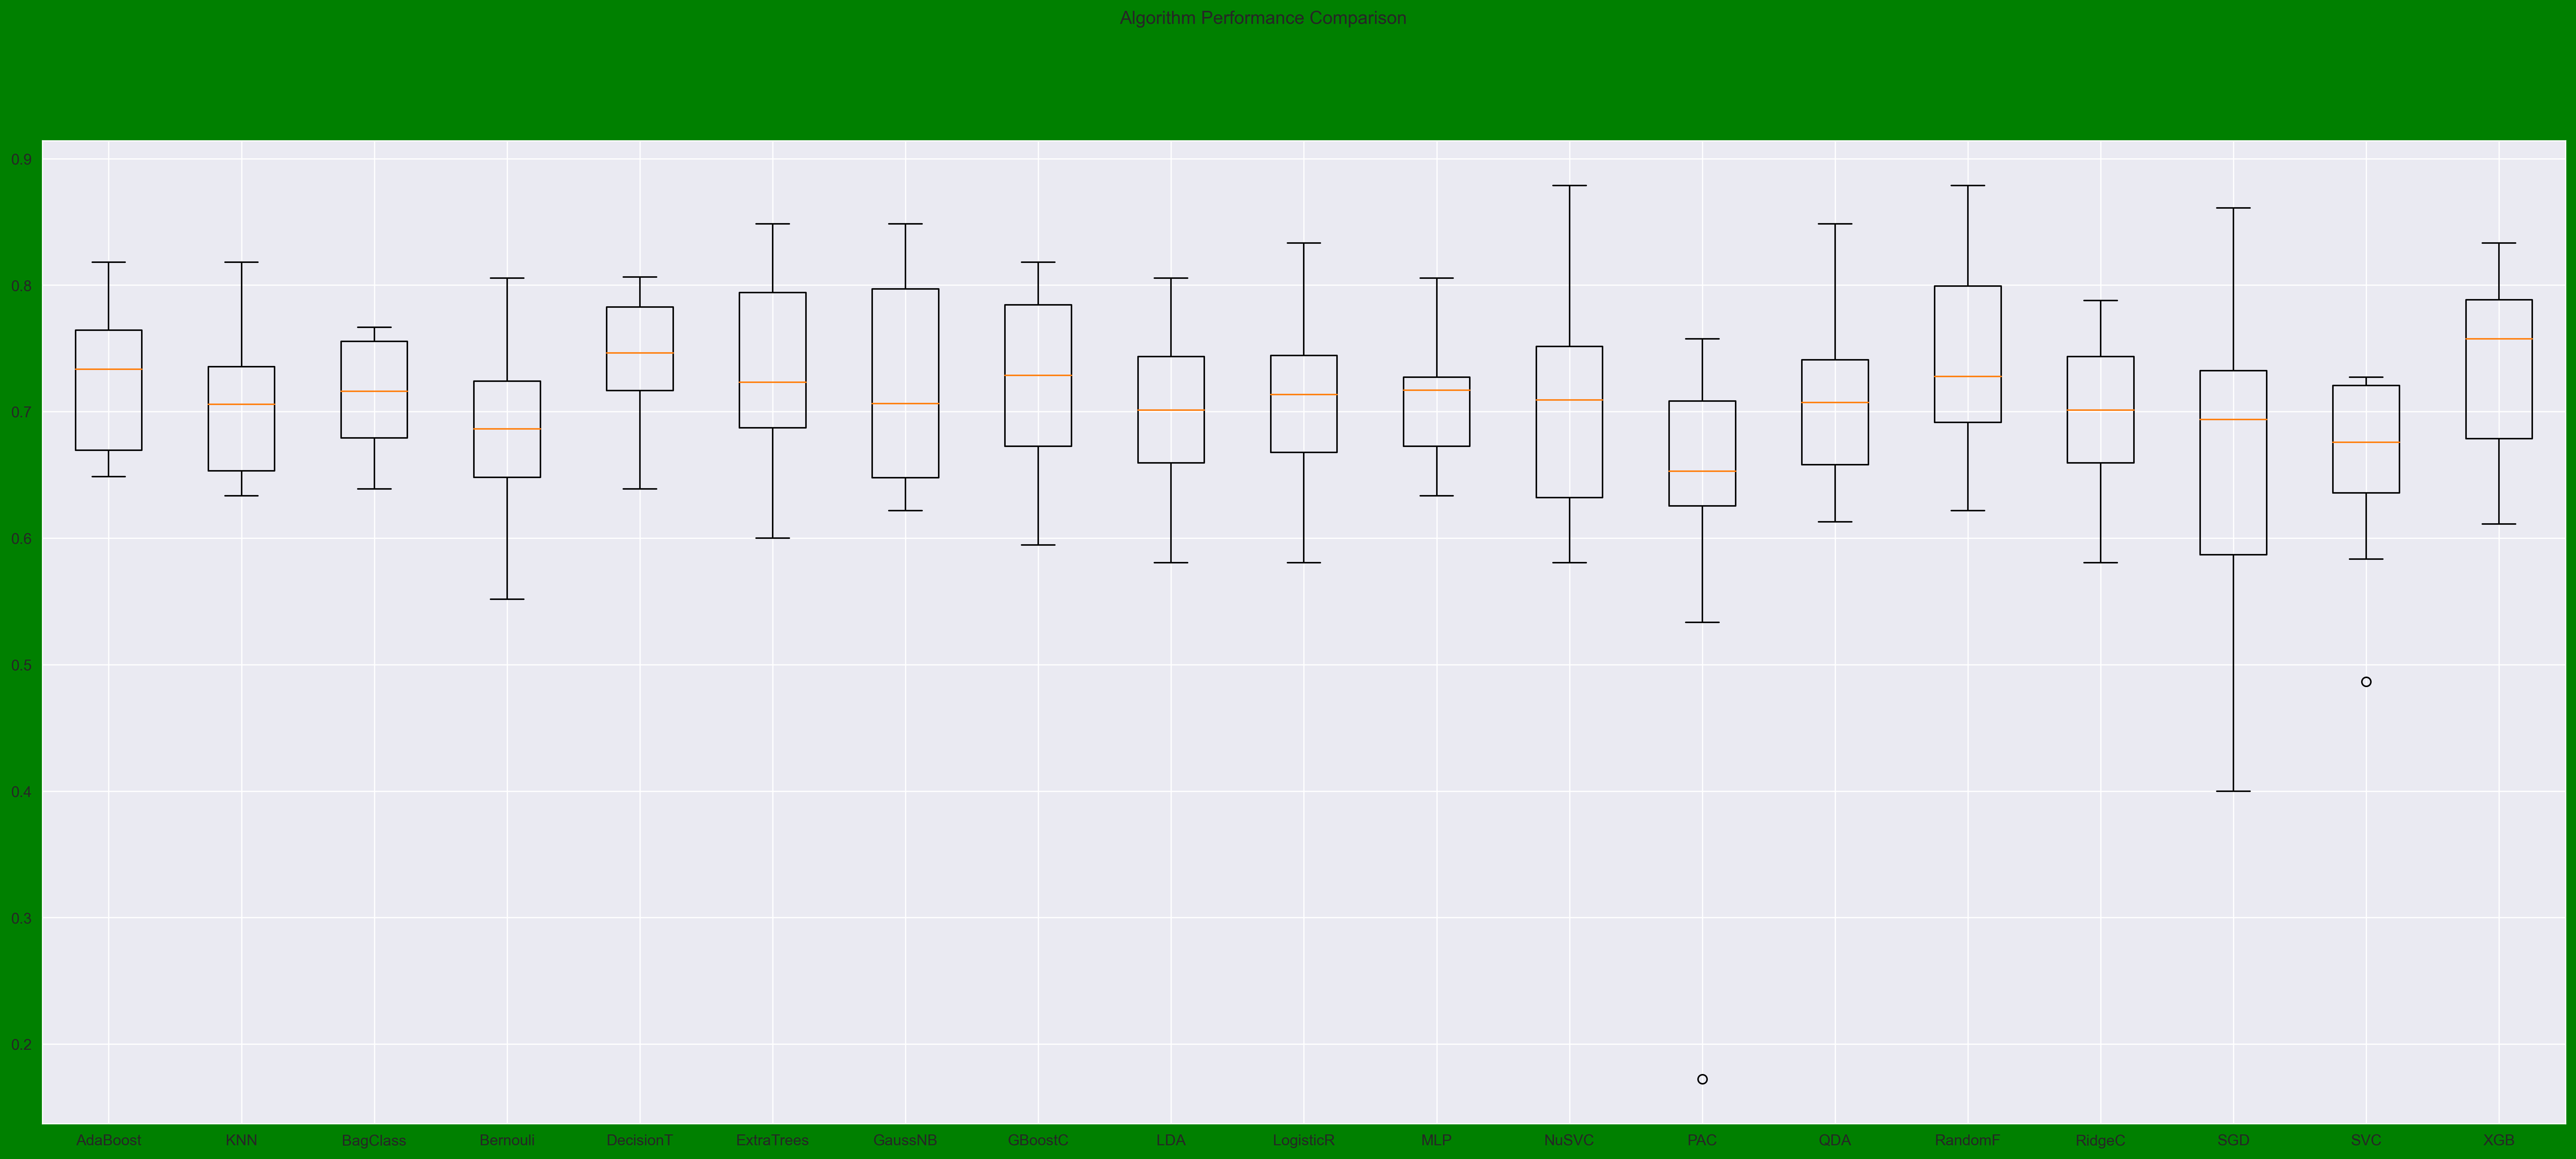

In [61]:
fig = plt.figure(figsize=(30,12), dpi= 300, facecolor='g', edgecolor='w')
fig.suptitle('Algorithm Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Tuning top 3 Models

## KNN Tuning

In [16]:
#models[1][1].get_params()

In [122]:
%%time
scoring = 'accuracy'
model_knn = GridSearchCV(estimator = models[1][1], 
                         param_grid = {'model__n_neighbors': np.arange(6,15),
                                       'model__leaf_size': np.arange(1,50,5)},
                         cv=10,
                         scoring=scoring)
model_knn.fit(X, Y)
print(f'highest scoring model: {round(model_knn.best_score_, 3)}, with params: {model_knn.best_params_}')

highest scoring model: 0.832, with params: {'model__leaf_size': 1, 'model__n_neighbors': 10}
Wall time: 6.5 s


## Cross_val_score() on best KNN model (same as above)

In [123]:
cv_results = cross_val_score(model_knn.best_estimator_, X, Y, cv=10, scoring=scoring)
print(round(cv_results.mean(), 3))

0.832


## cross_val_predict() for KNN

In [223]:
y_pred_probs_knn = cross_val_predict(model_knn.best_estimator_, X, Y, cv=10, method='predict_proba')[:,1]

## confusion_matrix() for KNN

In [221]:
print(confusion_matrix(Y, y_preds))

[[500  49]
 [ 85 257]]


## Classification Report for KNN

In [186]:
print(classification_report(Y, y_preds))

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       549
         1.0       0.83      0.70      0.76       342

    accuracy                           0.83       891
   macro avg       0.83      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891



## Manual checking of classification metrics from Cmatrix above

In [187]:
# calculating manual recall score from Cmatrix above to verify results
print(f'shape of Y: {Y.shape}')
print(f'total samples in Cmatrix: {488+61+90+252}\n')

print(f'accuracy score of Cmatrix: {round((488+252) / (488+61+90+252), 2)}')
print(f'recall score of Cmatrix: {round(252 / (252+90), 2)}')
print(f'precision score of Cmatrix: {round(252 / (252+61), 2)}')
print(f'specificity score of Cmatrix: {round(488 / (488+61), 2)}')

shape of Y: (891,)
total samples in Cmatrix: 891

accuracy score of Cmatrix: 0.83
recall score of Cmatrix: 0.74
precision score of Cmatrix: 0.81
specificity score of Cmatrix: 0.89


## roc_auc_score() for KNN

In [219]:
plt.rcParams["figure.figsize"] = (5,5)
sns.set(context='talk',
        font_scale=.85,
        font='arial',
        palette='dark',
        rc={"lines.linewidth" : 5})

#knn
fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y, y_pred_probs_knn)
auc_knn = round(auc(fpr_knn, tpr_knn), 2)

#gbc
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(Y, y_pred_probs_gbc)
auc_gbc = round(auc(fpr_gbc, tpr_gbc), 2)

plt.plot(fpr_knn, tpr_knn, linestyle='-', label = f'KNN (auc = {auc_knn})')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

# print(round(roc_auc_score(Y, y_preds_probas), 2))

NameError: name 'y_pred_probs_knn' is not defined

## plot_roc_curve() for KNN

In [209]:
# plt.rcParams["figure.figsize"] = (5,5)
# sns.set(context='talk',
#         font_scale=.85,
#         font='arial',
#         palette='dark',
#         rc={"lines.linewidth" : 5})


# knn = plot_roc_curve(model_knn.best_estimator_, X, Y, name = 'knn')
# gbc = plot_roc_curve(model_gbc.best_estimator_, X, Y, name = 'gbc', ax=knn.ax_)
# knn.figure_.suptitle("ROC curve comparison")
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')

## Gradient Boosted Classifer Tuning

In [10]:
# models[8][1].get_params()

In [178]:
%%time
model_gbc = GridSearchCV(estimator = models[7][1], 
                         param_grid = {'model__max_depth': [2,3,4,5,6,7],
                                       'model__n_estimators': [25,50,75,100,150,200]},
                         cv=10,
                         scoring = scoring)

model_gbc.fit(X, Y)
print(f'highest mean cv score: {model_gbc.best_score_}, with params: {model_gbc.best_params_}')

highest mean cv score: 0.8485018726591761, with params: {'model__max_depth': 4, 'model__n_estimators': 100}
Wall time: 41.7 s


### GBC cross_val_predict(), confusion_matrix(), and classification_report()

In [218]:
y_preds = cross_val_predict(model_gbc.best_estimator_, X, Y, cv=10)
y_preds_probs_gbc = cross_val_predict(model_gbc.best_estimator_, X, Y, cv=10, method='predict_proba')[:,1]
# print(y_preds_probas[:100])

print(confusion_matrix(Y, y_preds))
print(classification_report(Y, y_preds))

fpr, tpr, thresholds = roc_curve(Y, y_preds_probs_gbc)
print(fpr[:10])
print()
print(tpr[:10])
print('\n')

print(round(auc(fpr, tpr),2))
print(round(roc_auc_score(Y, y_preds_probas), 2))
print('\n')

[[500  49]
 [ 85 257]]
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       549
         1.0       0.84      0.75      0.79       342

    accuracy                           0.85       891
   macro avg       0.85      0.83      0.84       891
weighted avg       0.85      0.85      0.85       891

[0.         0.         0.         0.         0.         0.
 0.         0.00182149 0.00182149 0.00546448]

[0.         0.00292398 0.03508772 0.04093567 0.16374269 0.16959064
 0.2251462  0.2251462  0.25146199 0.25146199]


0.89
0.89




In [20]:
# Ah hah! so the GridsearchCV object natively becomes the best model found /
# there is no need to set it equal to the "best_estimator_", 
# because this is the default behavior

## Tuning Random Forest

In [21]:
models[-4][1].get_params()

{'memory': None,
 'steps': [('scaling', StandardScaler()), ('model', RidgeClassifier())],
 'verbose': False,
 'scaling': StandardScaler(),
 'model': RidgeClassifier(),
 'scaling__copy': True,
 'scaling__with_mean': True,
 'scaling__with_std': True,
 'model__alpha': 1.0,
 'model__class_weight': None,
 'model__copy_X': True,
 'model__fit_intercept': True,
 'model__max_iter': None,
 'model__normalize': False,
 'model__random_state': None,
 'model__solver': 'auto',
 'model__tol': 0.001}

In [22]:
%%time
model_rf = GridSearchCV(estimator = models[-5][1], 
                        param_grid = {'model__n_estimators': [12,25,50,100,150,200,250,300,350],
                                      'model__n_jobs': [1,5,10]},
                        cv=10)

model_rf.fit(X, Y)
print(f'highest score: {model_rf.best_score_}, with params: {model_rf.best_params_}')

highest score: 0.8373033707865168, with params: {'model__n_estimators': 100, 'model__n_jobs': 5}
Wall time: 2min 9s


In [23]:
print(np.arange(.01,.03,.01))
np.arange(1800,2300, 100)
np.arange(1,6)

[0.01 0.02]


array([1, 2, 3, 4, 5])

## Tuning XGB

In [24]:
%%time

model_xgb = GridSearchCV(estimator = models[-1][1], 
                         param_grid = {'model__learning_rate': [0.01],
                                       'model__n_estimators': np.arange(1300,1900, 100),
                                       'model__min_child_weight': np.arange(4,8)},
                         cv=10)

model_xgb.fit(X, Y)
print(f'highest score: {model_xgb.best_score_}, with params: {model_xgb.best_params_}')

highest score: 0.8451685393258428, with params: {'model__learning_rate': 0.01, 'model__min_child_weight': 5, 'model__n_estimators': 1700}
Wall time: 6min 20s


## Scaling dataset with StandardScaler()

In [25]:
%%time
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Wall time: 7 ms


## Voting Classifer with top 4 models

In [26]:
%%time
model_voting = VotingClassifier(estimators = [('knn', model_knn.best_estimator_),
                                              ('gbc', model_gbc.best_estimator_),
                                              ('rf', model_rf.best_estimator_),
#                                               ('xgb', model_xgb.best_estimator_)
                                                              ],
                                            voting = 'soft')
scoring = 'accuracy'


kfold = KFold(n_splits=2, random_state=1, shuffle=True)
cv_results_voting = pd.DataFrame(cross_val_score(model_voting, X, Y, cv=kfold, scoring=scoring))

# okay so I can see in the docs it says that if you call .predict() it will use the best model, but,
# does that mean it actually reruns the CV function everytime .predict() is called, to find it?
# Okay, yep, wow, this looks correct, so it should take about twice as long for this CV to run ontop of the GridCV thats already in the function
# Okay, yep, just about twice as long, so the model.best_estimator_ method is useful, or else it will just rerun the whole gridCV
# ah....... so the predict() function, does immediately use the "best_estimator_", however, the cross_val_score() function does not,
# so this is something to keep an eye on, and when in doubt, just add model.best_estimator_ onto it since this will always work

display(cv_results_voting.mean())
display(cv_results_voting.head(2))

model_voting.fit(X, Y)

0    0.844024
dtype: float64

,0
0,0.818386
1,0.869663


Wall time: 3.14 s


VotingClassifier(estimators=[('knn',
                              Pipeline(steps=[('scaling', StandardScaler()),
                                              ('model',
                                               KNeighborsClassifier(leaf_size=1,
                                                                    n_neighbors=10))])),
                             ('gbc',
                              Pipeline(steps=[('scaling', StandardScaler()),
                                              ('model',
                                               GradientBoostingClassifier(max_depth=4))])),
                             ('rf',
                              Pipeline(steps=[('scaling', StandardScaler()),
                                              ('model',
                                               RandomForestClassifier(n_jobs=5))]))],
                 voting='soft')

In [27]:
from sklearn import metrics, model_selection
metrics.plot_roc_curve(model_voting, X, Y)
plt.xlabel("True Positive Rate")
# plt.xlabel('True Positive Rate')

plt.show()                                   


NameError: name 'model_voting' is not defined

untuned is around .837-.847

scaled + tuned is around .848-.851



## Model.predict() on GBC Model

In [28]:
%%time
df_preds = pd.DataFrame(model_gbc.best_estimator_.predict(test_mvp_c))
df_preds = df_preds.astype(int)
display(df_preds.tail(2))


df_preds.insert(0, 'PassengerId', df_test['PassengerId'])
df_preds.rename(columns = {0: 'Survived'}, inplace=True)
display(df_preds.tail(5))

,0
416,0
417,0


,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


Wall time: 61.7 ms


## Model.predict() on Voting Model

In [29]:
%%time
df_preds = pd.DataFrame(model_voting.predict(test_mvp_c))
df_preds = df_preds.astype(int)
display(df_preds.tail(2))


df_preds.insert(0, 'PassengerId', df_test['PassengerId'])
df_preds.rename(columns = {0: 'Survived'}, inplace=True)
display(df_preds.tail(5))

,0
416,0
417,0


,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


Wall time: 111 ms


In [30]:
df_preds.to_csv(r'C:\Users\ggomp\OneDrive\Documents\GitHub\Kaggle_Competitions\titanic_classification\comp_preditions1.csv', index=False)

Notes from feature engineering:

Null accuracy                    = 61.7%

Drop NaNs with numeric columns   = 58.6% (train) base

OHC of sex column:               = 64.7% (train) +6%

IterativeImputer                 = 83.8% (train) +19%

OHC of Embarked column           = 83.1% (train) -.7%

QuantileTransformer              = 82.2% (train) -.9%

PolynomialFeatures (scaler)      = 71.2% (train) -11%

AutoPilot Accuracy               = 84.7% (train)

Highest Single model Tuning acc  = 84.9% (train) +.2%

Top 4 models Ensemble            = 85.1%         +.2%